In [408]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import cm 
from sklearn.decomposition import PCA as sklearnPCA


In [409]:
def get_ind(X, Y):
    inds_y = []
    classes = np.unique(Y)
    for which_class in classes:
        inds_y.append([i  for i, val in enumerate(Y)  if val==which_class])
    color_by_class=cm.rainbow(np.linspace(0,1,len(inds_y)))
    return inds_y, classes, color_by_class

def get_cov(X):
    X_std =StandardScaler().fit_transform(X)
    mean_vec = np.mean(X_std, axis=0)
    cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
    return X_std, cov_mat

def get_PCA(cov_mat, X_std):
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    eig_vecs = np.transpose(eig_vecs)

    ind=np.argsort(eig_vals)[::-1]  
    eig_vals=eig_vals[ind]
    eig_vecs=eig_vecs[ind]
    
    PCA = np.dot(eig_vecs, X_std.T)

    return eig_vals, eig_vecs, PCA



def get_evrs(eig_vals):
    norm = np.sum(eig_vals)
    evrs=[]
    for i, val in enumerate(eig_vals):
        evr = val
        for j in range(0, i):
            evr += eig_vals[j]
        evrs.append(evr/norm*100)
    return evrs

In [410]:

def plot_pcas(
    X, 
    Y, 
    pcas=[
        (0, 1),
        (1, 2),
        (1, 3),
        (2, 3)
    ]
):
    inds_y, classes, color_by_class = get_ind(X, Y)
    
    X_std, cov_mat =  get_cov(X)
    eig_vals, eig_vecs, PCA = get_PCA(cov_mat, X_std)
    evrs = get_evrs(eig_vals)

    
    plt.title("EVR")
    plt.scatter(range(len(evrs)), evrs)
    plt.show()
    
    fig, ax = plt.subplots(1, len(pcas))
    plt.title("IMPLEMENTADO")
    for i, (pc0, pc1) in enumerate(pcas):
        legend = []
        for color, ind_y in zip(color_by_class, inds_y):
            xs = [PCA[pc0,:][i] for i in ind_y]
            ys = [PCA[pc1,:][i] for i in ind_y]

            ax[i].scatter(xs, ys, c=color)
            

    plt.legend(classes)
    plt.show()
    
    n_components = max([v[0] for v in pcas] + [v[1] for v in pcas])+1
    sklearn_pca = sklearnPCA(n_components=n_components)
    Y_sklearn = sklearn_pca.fit_transform(X_std)
    
    fig, ax = plt.subplots(1, len(pcas))
    plt.title("LITERATURA")
    for i, (pc0, pc1) in enumerate(pcas):
        legend = []
        for color, name in zip(color_by_class, classes):
            ax[i].scatter(Y_sklearn[Y==name, pc0], Y_sklearn[Y==name, pc1], c=color)

    plt.legend(classes)
    plt.show()



    
    return eig_vals, eig_vecs,cov_mat, PCA, sklearn_pca,  classes

In [411]:
pcas=[
        (0, 1),
        (0, 2),
        (1, 3),
        (2, 7),
    ]
df = pd.read_csv("pulsar_stars.csv")
features = df.drop(columns="target_class").columns
X = df.ix[:,0:8].values
Y = df.ix[:,8].values
df.tail()

/Users/bmessias/venv/py3/lib/python3.5/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


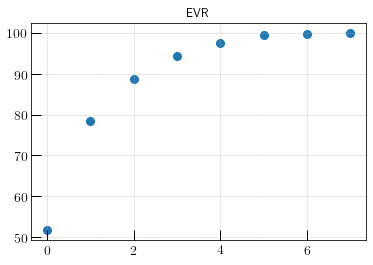

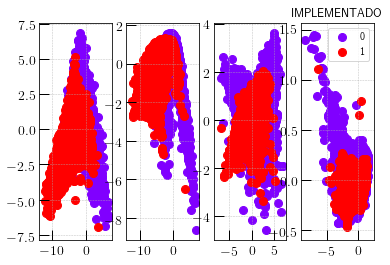

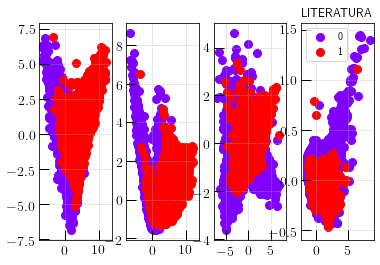

In [412]:
eig_vals, eig_vecs,cov_mat, PCA, sklearn_pca,  classes = plot_pcas(X, Y, pcas)

In [413]:

pd.DataFrame(eig_vecs,columns=features)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,0.359662,0.212348,-0.416137,-0.401487,-0.345626,-0.386321,0.370215,0.292284
1,0.361885,0.430214,-0.318140,-0.305770,0.247918,0.317227,-0.411022,-0.397759
2,0.013253,-0.436434,-0.091733,-0.083466,-0.570384,-0.234200,-0.273343,-0.582292
3,0.292256,-0.756788,-0.303047,-0.177898,0.332423,0.257732,0.037983,0.199998
4,0.744350,0.018959,0.146152,0.643611,-0.073339,-0.065944,0.003445,-0.015803
5,0.018412,0.046071,0.052285,-0.020743,-0.607197,0.751655,0.015316,0.245897
6,0.314590,-0.064169,0.773039,-0.539651,0.026313,-0.061073,-0.050651,0.033392
7,-0.027033,-0.004642,-0.060677,0.028477,-0.092068,-0.236184,-0.784238,0.561663


In [414]:
df = pd.read_csv("wine.txt")

X = df.ix[:,1:7].values
Y = df.ix[:,0].values

df.tail()
# split data table into data X and class labels y





/Users/bmessias/venv/py3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
176,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


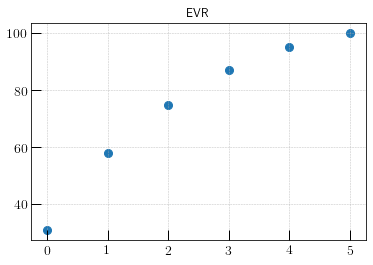

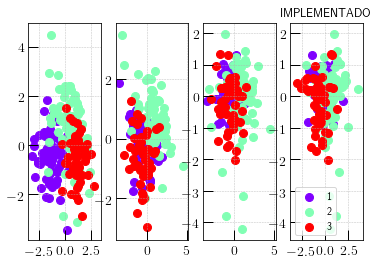

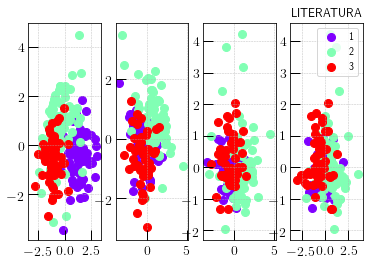

In [415]:
eig_vals, eig_vecs,cov_mat, PCA, sklearn_pca,  classes = plot_pcas(X, Y)

In [416]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')
features = [
    " sepal length"
]

X = df.ix[:,0:3].values
Y = df.ix[:,4].values
df.tail()

/Users/bmessias/venv/py3/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


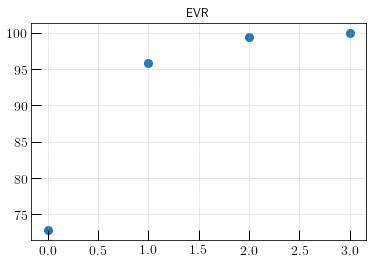

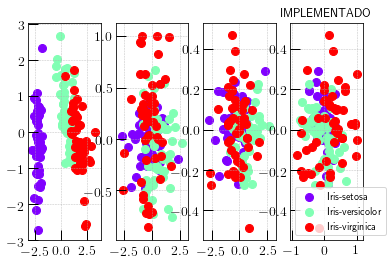

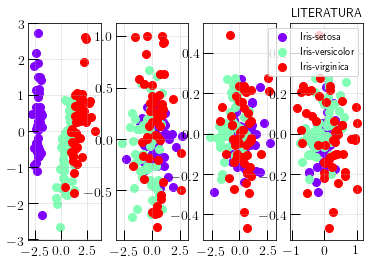

In [417]:
eig_vals, eig_vecs,cov_mat, PCA, sklearn_pca,  classes = plot_pcas(X, Y)

In [407]:
pd.DataFrame(eig_vecs,columns=features)

,0,1,2,3
0,0.522372,-0.263355,0.581254,0.565611
1,-0.372318,-0.925556,-0.021095,-0.065416
2,-0.721017,0.242033,0.140892,0.633801
3,0.261996,-0.124135,-0.801154,0.523546
